In [7]:
# TODO: plot score distribution and relation to x
# TODO: save score error also when training MAF

# Lotka-Volterra: joint score

In [11]:
import numpy as np
import corner
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import corner

In [44]:
"""
x 0 , mean = 90.01445033112581 , stddev = 21.112064192235803
x 1 , mean = 46.493556291390725 , stddev = 57.68914542302645
x 2 , mean = 8.44992065438293 , stddev = 0.6001361857879385
x 3 , mean = 7.738267249982391 , stddev = 0.7678445491986599
x 4 , mean = 0.9794287799922019 , stddev = 0.008680284613624096
x 5 , mean = 0.9360636777187384 , stddev = 0.020930606603214826
x 6 , mean = 0.9704934505643741 , stddev = 0.012502077286393836
x 7 , mean = 0.9120701539338105 , stddev = 0.02346010416896166
x 8 , mean = 0.10140494442076117 , stddev = 0.1682294662078485
"""

def transform_x(x_in):
    x_out = np.copy(x_in)
    
    means = [90.0, 46.5, 8.45, 7.74, 0.979, 0.936, 0.970, 0.912, 0.101]
    stds = [21., 58., 0.60, 0.77, 0.0087, 0.021, 0.013, 0.023, 0.17]
    
    for i, (x_, mean, std) in enumerate(zip(x_out.T, means, stds)):
        x_out[:, i] = (x_ - mean) / std
        
    return x_out

In [45]:
x_raw = np.load('../../data/samples/lotkavolterra/x_test_singletheta.npy')
x = transform_x(x_raw)

t_xz = np.load('../../data/samples/lotkavolterra/t_xz_test_singletheta.npy')

## Observables

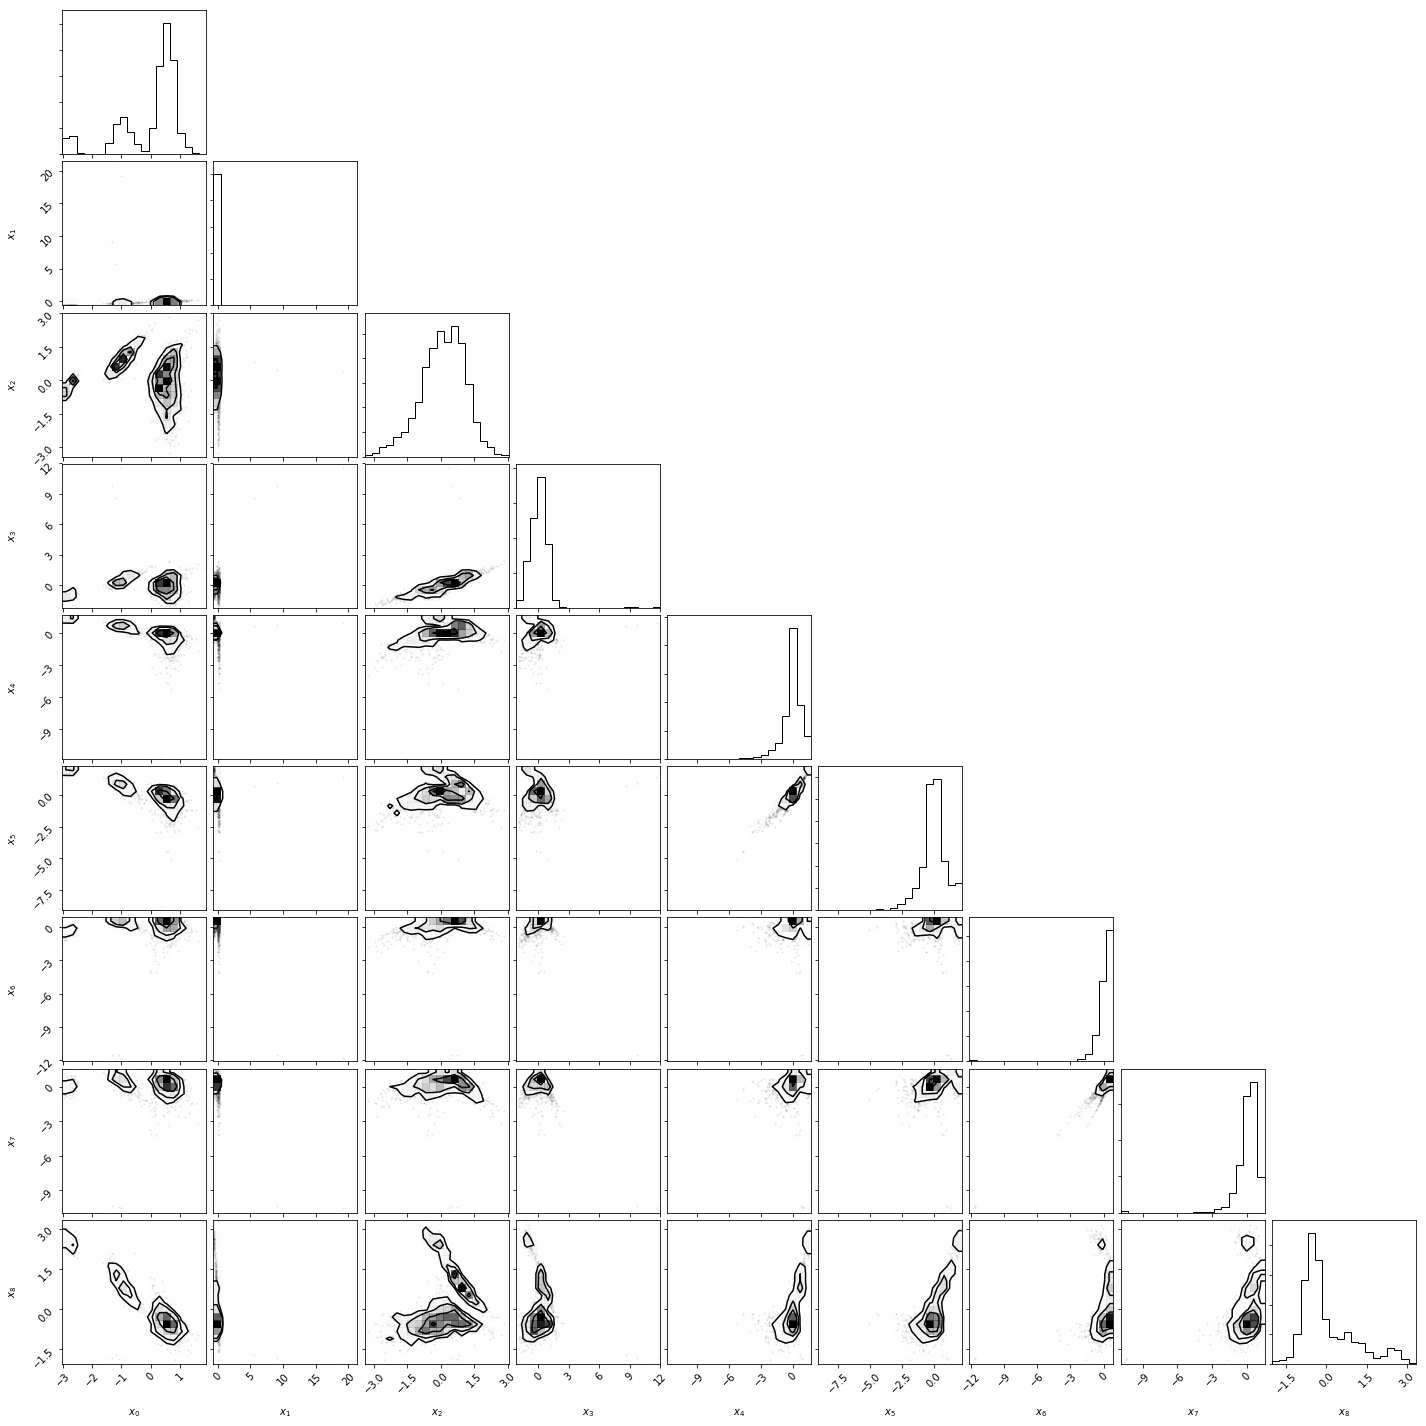

In [41]:
labels=[r'$x_' + str(i) + '$' for i in range(9)]
_ = corner.corner(x,labels=labels)

In [42]:
for i in range(9):
    mean = np.mean(x_raw[:,i])
    std = np.std(x_raw[:,i])
    
    print('x', i, ', mean =', mean, ', stddev =', std)

x 0 , mean = 90.01445033112581 , stddev = 21.112064192235803
x 1 , mean = 46.493556291390725 , stddev = 57.68914542302645
x 2 , mean = 8.44992065438293 , stddev = 0.6001361857879385
x 3 , mean = 7.738267249982391 , stddev = 0.7678445491986599
x 4 , mean = 0.9794287799922019 , stddev = 0.008680284613624096
x 5 , mean = 0.9360636777187384 , stddev = 0.020930606603214826
x 6 , mean = 0.9704934505643741 , stddev = 0.012502077286393836
x 7 , mean = 0.9120701539338105 , stddev = 0.02346010416896166
x 8 , mean = 0.10140494442076117 , stddev = 0.1682294662078485


In [46]:
for i in range(9):
    mean = np.mean(x[:,i])
    std = np.std(x[:,i])
    
    print('x', i, ', mean =', mean, ', stddev =', std)

x 0 , mean = 0.0006881110059918018 , stddev = 1.005336390106467
x 1 , mean = -0.00011109842429778638 , stddev = 0.9946404383280425
x 2 , mean = -0.00013224269511309217 , stddev = 1.0002269763132308
x 3 , mean = -0.0022503246981936016 , stddev = 0.9972007132450128
x 4 , mean = 0.049285056574929355 , stddev = 0.9977338636349536
x 5 , mean = 0.0030322723208721413 , stddev = 0.9966955525340393
x 6 , mean = 0.037957735721079 , stddev = 0.961698252799526
x 7 , mean = 0.003050171035240874 , stddev = 1.0200045290852897
x 8 , mean = 0.002382026004477435 , stddev = 0.9895850953402854


## Score

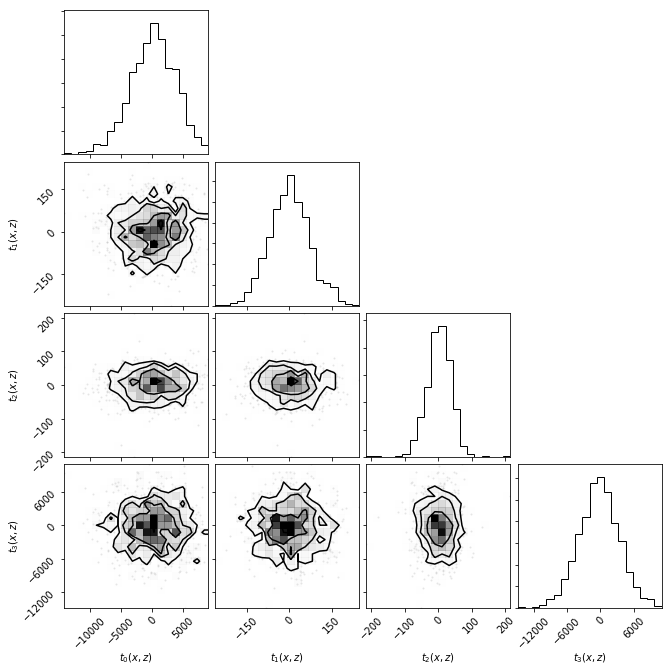

In [21]:
labels=[r'$t_' + str(i) + '(x,z)$' for i in range(4)]
_ = corner.corner(t_xz,labels=labels)

## Relation between score and observables

4 parameters, 9 observables


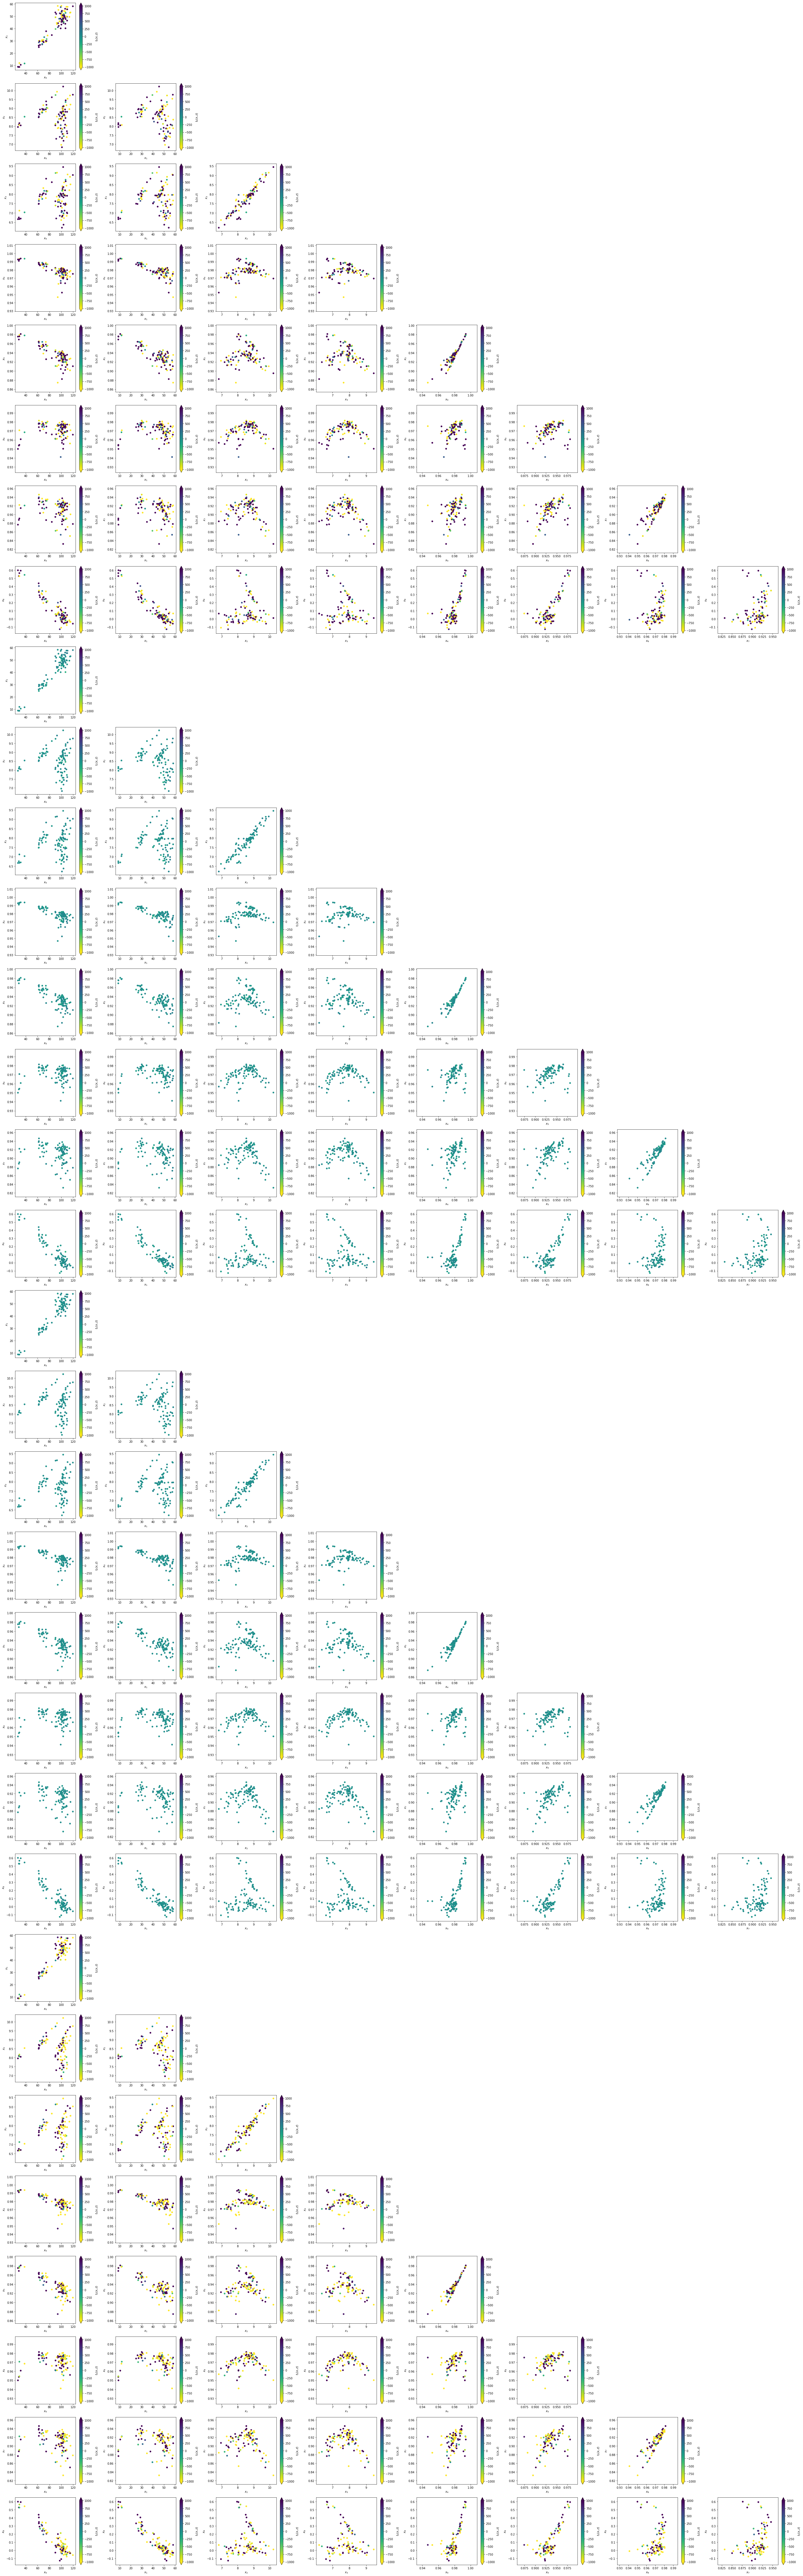

In [17]:
crange=-1000.,1000.
skip=10

n_parameters = t_xz.shape[1]
n_observables = x.shape[1]

print('{} parameters, {} observables'.format(n_parameters, n_observables))

n_x_panels = (n_observables - 1)
n_y_panels = (n_observables - 1) * n_parameters


fig = plt.figure(figsize=(n_x_panels * 5., n_y_panels * 4.))

for it in range(n_parameters):
    for iy in range(1, n_observables):
        for ix in range(0, iy):
            i_panel = 1 + (it * (n_observables - 1) + (iy - 1)) * n_x_panels + ix
            ax = plt.subplot(n_y_panels, n_x_panels, i_panel)

            sc = plt.scatter(x[::skip, ix], x[::skip, iy], c=t_xz[::skip,it], s=25.,
                             norm=matplotlib.colors.Normalize(vmin=crange[0], vmax=crange[1]), cmap='viridis_r')
            cbar = fig.colorbar(sc, ax=ax, extend='both')

            plt.xlabel(r'$x_' + str(ix) + '$')
            plt.ylabel(r'$x_' + str(iy) + '$')
            cbar.set_label(r'$t_' + str(it) + '(x,z)$')

plt.tight_layout()
plt.show()